In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\sanja\\Downloads\\train.csv")

In [3]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


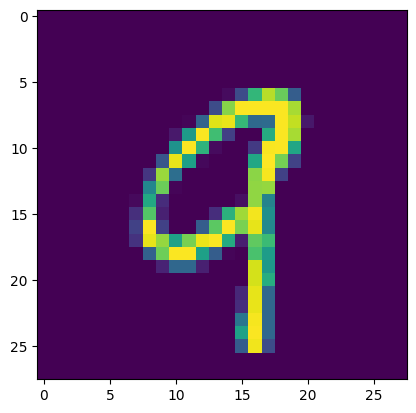

In [34]:
plt.imshow(df.iloc[41999,1:].values.reshape(28,28))

In [8]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
x_train.shape

(33600, 784)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier()

In [15]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [16]:
import time
start = time.time()
y_pred = knn.predict(x_test)
print(time.time() - start)

15.180915117263794


In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [21]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [24]:
# PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=100)

In [26]:
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [27]:
x_train_trf.shape

(33600, 100)

In [28]:
knn = KNeighborsClassifier()

In [29]:
knn.fit(x_train_trf,y_train)

KNeighborsClassifier()

In [30]:
y_pred = knn.predict(x_test_trf)

In [31]:
accuracy_score(y_test,y_pred)

0.9557142857142857